# TITANIC - SURVIVAL PREDICTION

## This notebook is for kaggle project competetion on titanic survival predictions

### We are given following data :
##### -> train.csv == it has all the training data
##### -> test.csv == it has all the test data to predict the test cases based on the model trained by us

===================================================================================

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

### Getting data

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing the data

In [4]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Titanic Correlations')

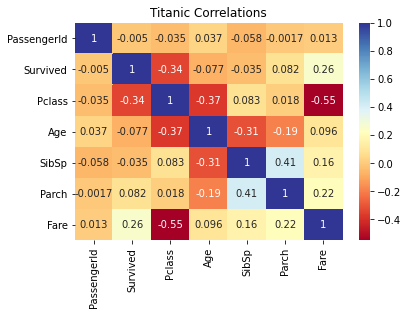

In [7]:
sns.heatmap(df.corr() , cmap='RdYlBu' , annot=True)
plt.title('Titanic Correlations')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

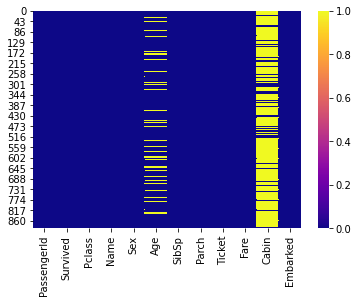

In [9]:
sns.heatmap(df.isnull() , cmap = 'plasma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

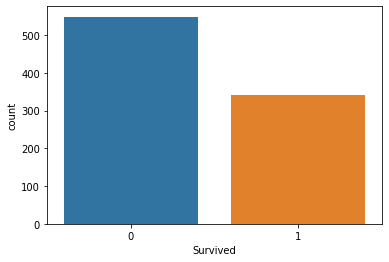

In [10]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

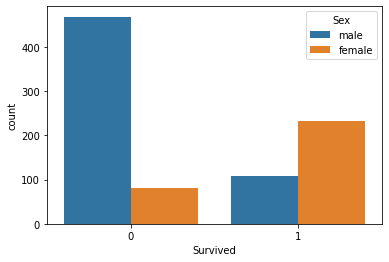

In [11]:
sns.countplot(df['Survived'] , hue=df['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

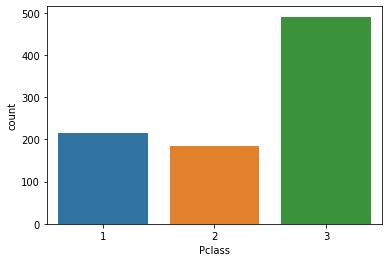

In [12]:
sns.countplot(df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

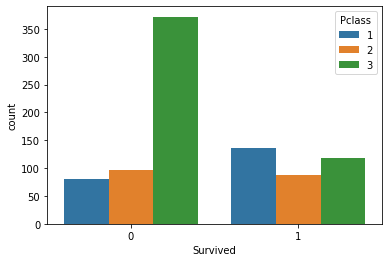

In [13]:
sns.countplot(x='Survived' , hue = 'Pclass' , data=df)

<AxesSubplot:>

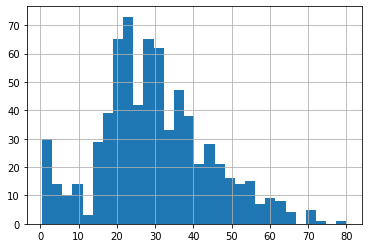

In [14]:
df['Age'].hist(bins=30)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

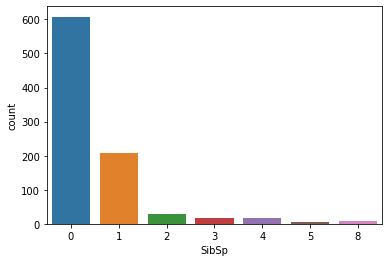

In [15]:
sns.countplot(df['SibSp'])

df['SibSp'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

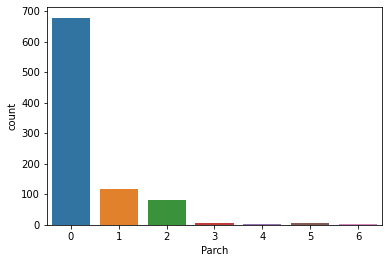

In [16]:
sns.countplot(df['Parch'])
df['Parch'].value_counts()

<AxesSubplot:>

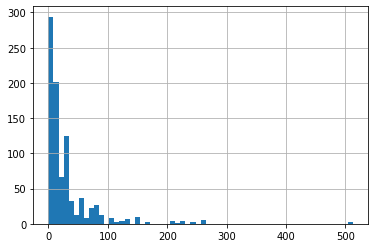

In [17]:
df['Fare'].hist(bins=60)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

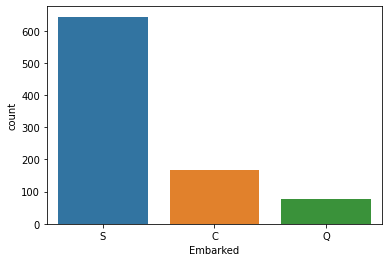

In [18]:
sns.countplot(df['Embarked'])

In [19]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
              ..
E46            1
C54            1
D37            1
D56            1
B3             1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

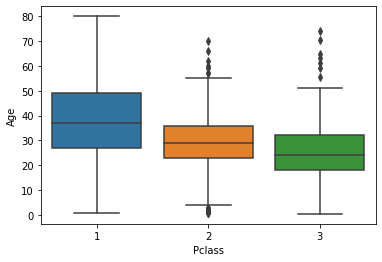

In [20]:
sns.boxplot(x='Pclass' , y='Age' , data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

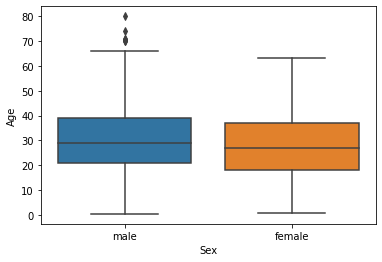

In [21]:
sns.boxplot(x='Sex' , y='Age' , data=df)

### Fixing Data

In [22]:
# according to box plots between age and pclass average age for
# pclass = 1 is around 38 , pclass = 2 is around 30 and pclass = 3 around 25
# we use Pclass as Pclass has highest correlation with Age

age_groups = df.groupby('Pclass')['Age']

print("Median grouped by Pclass:\n" , age_groups.median())
print('\n')
print("Mean grouped by Pclass:\n" , age_groups.mean())

Median grouped by Pclass:
 Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


Mean grouped by Pclass:
 Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [23]:
df.loc[df['Age'].isnull() , 'Age'] = df.groupby('Pclass')['Age'].transform('mean')

In [24]:
# check if Age columns still has null values
df['Age'].isnull().sum()    #0 says that we do not have any more null values in Age columns

0

<AxesSubplot:>

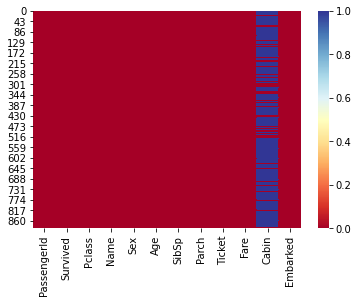

In [25]:
sns.heatmap(df.isnull() , cmap='RdYlBu')

In [26]:
# Now we need to fix the Age Columns in df_test as well

df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
df_test['Age'] = df_test.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.mean()))

In [28]:
# check again for df_test
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
# we have 1 missing value for fare as well and we have again fare highly corr with Pclass
df_test['Fare'] = df_test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

In [30]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
#We have 2 missing Embarked values
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
# We have S as the mode of category Embarked
df['Embarked'] = df['Embarked'].fillna('S')

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
# Now we have lot of unknown values in column cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
# we fill all null cabins to be Unknown or U for both the df and df_test
df['Cabin'] = df['Cabin'].fillna('U')
df_test['Cabin'] = df_test['Cabin'].fillna('U')

In [37]:
df['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [38]:
# We see a lot of cabins with same initial alphabet, thus we store cabins as their initial alphabets

df['Cabin'] = df['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
df_test['Cabin'] = df_test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [39]:
# Mapping Sex male:1 female:0
Sex_cat = {'male' : 0 , 'female':1}
df['Sex'] = df['Sex'].map(Sex_cat)
df_test['Sex'] = df_test['Sex'].map(Sex_cat)

# Converting unique Embarked values and mapping them in numbers
Em_cat = {'S' : 0 , 'Q' : 1 , 'C' : 2}
df['Embarked'] = df['Embarked'].map(Em_cat)
df_test['Embarked'] = df_test['Embarked'].map(Em_cat)

cabin_cat = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7 , 'U':8}
df['Cabin'] = df['Cabin'].map(cabin_cat)
df_test['Cabin'] = df_test['Cabin'].map(cabin_cat)

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

####  Checking the title of the name

In [41]:
df['Name'] = df.Name.str.extract('([A-Za-z]+)\.' , expand=False)
df_test['Name'] = df_test.Name.str.extract('([A-Za-z]+)\.' , expand=False)

In [42]:
df['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [43]:
df['Name'].value_counts(normalize = True) * 100

Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Major        0.224467
Col          0.224467
Mlle         0.224467
Sir          0.112233
Lady         0.112233
Mme          0.112233
Capt         0.112233
Jonkheer     0.112233
Don          0.112233
Countess     0.112233
Ms           0.112233
Name: Name, dtype: float64

In [44]:
df_test['Name'].value_counts(normalize = True) * 100

Mr        57.416268
Miss      18.660287
Mrs       17.224880
Master     5.023923
Rev        0.478469
Col        0.478469
Ms         0.239234
Dr         0.239234
Dona       0.239234
Name: Name, dtype: float64

In [45]:
df.rename(columns={'Name' : 'Title'} , inplace = True)
df_test.rename(columns={'Name' : 'Title'} , inplace = True)

In [46]:
df['Title'] = df['Title'].replace(['Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer'] , 'Other')

df_test['Title'] = df_test['Title'].replace(['Rev',
 'Dr',
 'Ms',
 'Col',
 'Dona'] , 'Other')

In [47]:
df['Title'].value_counts(normalize=True)*100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [48]:
title_cat = {'Mr':0 , 'Miss':1 , 'Mrs':2 , 'Master':3 , 'Other':4}
df['Title'] = df['Title'].map(title_cat)
df_test['Title'] = df_test['Title'].map(title_cat)

In [49]:
df['Title'].unique().tolist()

[0, 2, 1, 3, 4]

In [50]:
df_test['Title'].unique().tolist()

[0, 2, 1, 3, 4]

### Making checkpoint and saving our data

In [51]:
df_train = df.copy()
df_test_set = df_test.copy()

### Building the model

In [52]:
# Creating a column in both df_train and df_test_set of family = SibSp + Parch +1
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test_set['Family'] = df_test_set['SibSp'] + df_test_set['Parch'] + 1

In [54]:
df_train = df_train.drop([ 'SibSp' , 'Parch' , 'Ticket'],axis=1)
df_test_set = df_test_set.drop([ 'SibSp' , 'Parch' , 'Ticket'],axis=1)

In [55]:
# Creating the RandomForestClassifier model
# Before that lets create our train and test split on df_train data
from sklearn.model_selection import train_test_split

X = df_train.drop(['PassengerId' , 'Survived'] , axis=1)
y= df_train['Survived']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=101)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2)

In [57]:
param_grid_ = {
    'criterion':['gini' , 'entropy'],
    'n_estimators' : [100 ,300 , 500],
    'max_features' : ['auto' , 'log2'],
    'max_depth' : [3 , 5 , 7]
}

In [58]:
from sklearn.model_selection import GridSearchCV
rfc_CV = GridSearchCV(estimator=rfc , param_grid = param_grid_ , cv=5)

rfc_CV.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [59]:
rfc_CV.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 300}

In [60]:
rfc_final = RandomForestClassifier(random_state=2 , criterion='entropy' , max_depth=5 , max_features='auto' , n_estimators = 500)
rfc_final.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=500,
                       random_state=2)

In [61]:
preds = rfc_final.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

print("Accuracy : " , accuracy_score(y_test , preds)*100)

Accuracy :  82.08955223880598


In [63]:
df_test['Survived'] = rfc_final.predict(df_test_set.drop(['PassengerId'], axis = 1))

In [64]:
df_test.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,0,0,34.5,0,0,330911,7.8292,8,1,0
1,893,3,2,1,47.0,1,0,363272,7.0000,8,0,0
2,894,2,0,0,62.0,0,0,240276,9.6875,8,1,0
3,895,3,0,0,27.0,0,0,315154,8.6625,8,0,0
4,896,3,2,1,22.0,1,1,3101298,12.2875,8,0,1


In [65]:
df_test[['PassengerId' , 'Survived']].to_csv("My_Submission_3.csv" , index=False)

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Title        418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 39.3+ KB
